In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from showcase.slicer import SpectrumSlicer

### 1. Set up data

In [2]:
main_folder = Path("/Users/georgwallmann/Documents/data/alphadia-validate/").expanduser()

In [3]:
from showcase.io import prepare_data

precursor_df, spectral_library, spectral_library_flat, dia_data = prepare_data(
    main_folder
)

In [4]:
precursor_df

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,...,_candidate_idx,valid,candidate_idx,run,mod_seq_hash,mod_seq_charge_hash,pg_master,pg,pg_qval,intensity
0,0.0,20.185303,878.493469,0.000001,7.403505e+09,7.403505e+09,1.508568e+10,5.548682e+09,0.023692,0.023692,...,250551,True,250551,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,13886784644007243628,13886784644007243630,P62805,P62805,0.000000,4.407890e+09
1,0.0,23.255554,685.877808,0.000001,1.020231e+10,1.020231e+10,1.767223e+10,7.734530e+09,-0.178309,0.178309,...,28615,True,28615,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,14751110910839796002,14751110910839796004,P62805,P62805,0.000000,4.407890e+09
2,0.0,10.868530,207.885986,0.000001,1.231147e+06,1.231147e+06,2.963482e+06,9.690639e+05,1.002455,1.002455,...,430315,True,430315,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,8447969178672477057,8447969178672477059,P05198,P05198,0.000000,8.145818e+07
3,0.0,32.611755,335.372009,0.000001,3.080493e+07,3.080493e+07,6.823846e+07,2.349190e+07,0.552120,0.552120,...,432992,True,432992,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,16672682504243237715,16672682504243237717,P24534,P24534,0.000000,1.414546e+08
4,0.0,17.024841,489.280182,0.000001,5.295387e+09,5.295387e+09,9.861745e+09,4.008995e+09,0.433430,0.433430,...,94164,True,94164,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,12739187365774023873,12739187365774023875,P62805,P62805,0.000000,4.407890e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96653,0.0,10.856445,763.536682,0.000001,0.000000e+00,0.000000e+00,6.323429e+07,1.771535e+07,0.650092,0.650092,...,305648,True,305648,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,8711449208171012044,8711449208171012046,Q6PII3,Q6PII3,0.001549,1.083437e+06
96654,0.0,13.943115,335.372009,0.000001,0.000000e+00,0.000000e+00,1.473603e+06,1.402451e+05,-0.272059,0.272059,...,4295022915,True,4295022915,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,10442234539241088052,10442234539241088054,Q9UPU5,Q9UPU5,0.000000,3.512030e+06
96655,0.0,13.870605,538.827026,0.000001,0.000000e+00,0.000000e+00,2.453268e+07,6.309366e+06,-0.969690,0.969690,...,287611,True,287611,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,13139006477702834247,13139006477702834249,P06756,P06756,0.000000,1.125747e+06
96656,0.0,13.955933,699.839478,0.000001,1.807544e+06,1.807544e+06,4.539744e+06,1.719948e+06,-1.809569,1.809569,...,4295150111,True,4295150111,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,4442682440781844104,4442682440781844106,Q07864,Q07864,0.000000,1.473730e+06


In [15]:
# user input: select a hash
selected_hash = precursor_df["mod_seq_charge_hash"].iloc[4000]

# alternatively: use a random one from a certain percentile
# from notebooks.magnus_utils.small_helpers import get_random_precursor_hash
# selected_hash = get_random_precursor_hash(precursor_df, 0)

## 2. Preprocess

In [16]:
library_wrapper = SpectrumSlicer(spectral_library_flat, precursor_df, dia_data)

mz_library, intensity_library, spectrum_slice = library_wrapper.get_by_hash(
    selected_hash
)

## 3. Simple plots

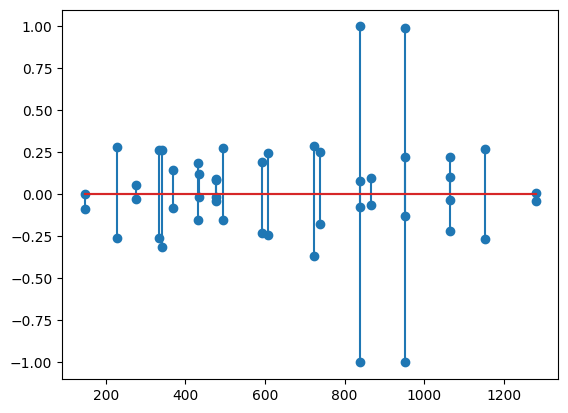

In [17]:
from showcase.plots_original import plot_simple_mirror

plot_simple_mirror(spectrum_slice, intensity_library, mz_library)

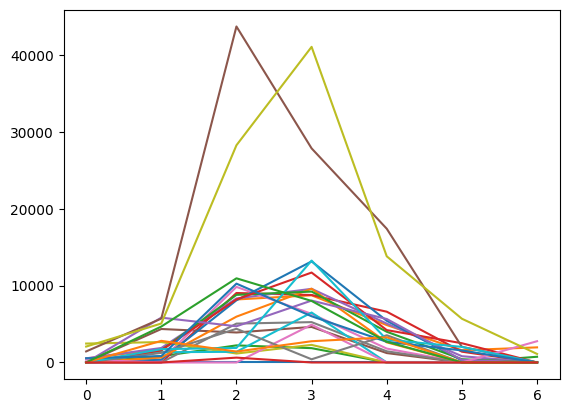

In [18]:
from showcase.plots_original import plot_simple_xic

plot_simple_xic(spectrum_slice)

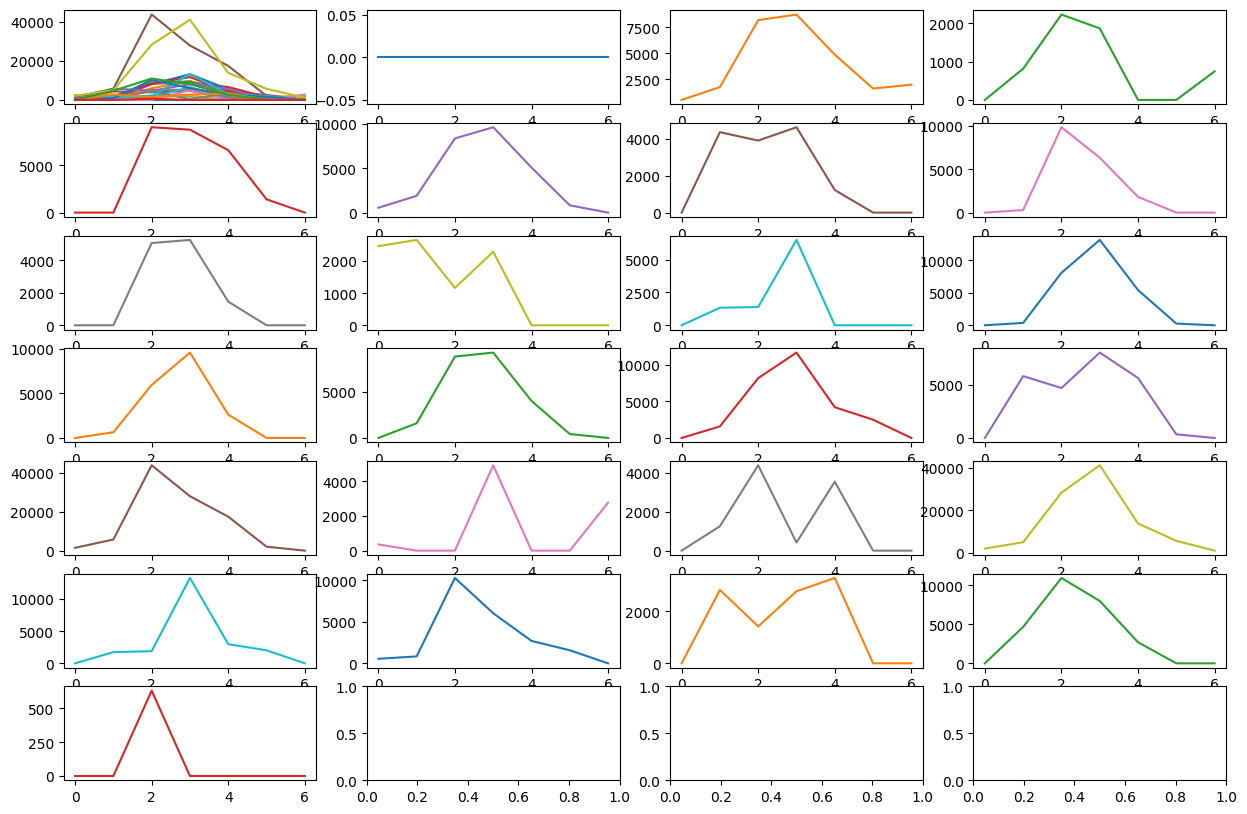

In [19]:
from magnus_utils.xic_plots import plot_all_xics

plot_all_xics(spectrum_slice)

In [20]:
from mirror_plotting import plot_mirror_byRT

plot_mirror_byRT(spectrum_slice, mz_library, intensity_library,  width=800, height=300)

alt.LayerChart(...)

In [21]:
from showcase.mirror_plotting_2 import plot_mirror_2

plot_mirror_2(spectrum_slice, mz_library, intensity_library, )

alt.Chart(...)

In [23]:
from xic.plots import plot_advanced_xic
plot_advanced_xic(spectrum_slice, dia_data )

alt.LayerChart(...)